## Preamble

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import describe
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24

# disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# plots inisde jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', palette='muted')
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

import datetime as dt
import xgboost as xgb

In [2]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [3]:
def serie_split(s, fcast_len = 90):
    """
    We split our datasets: year 2017 is used for validation and the rest is for training.
    As our goal is to predict the first 90 days of 2018, we use only the first 90 days for validation.
    """
    train = s.iloc[s.index < '2017-01-01']
    test = s.iloc[s.index >= '2017-01-01'].iloc[:fcast_len]
    
    return train, test

## Load data

In [4]:
df = pd.read_csv('./data/train.csv')
df['date'] = pd.to_datetime(df['date'])
df.index = pd.DatetimeIndex(df['date'])

## Training

In [5]:
from rolling import Rolling

In [6]:
def train_and_validate(serie):
    r = Rolling(window=365)

    model = xgb.XGBRegressor(n_jobs=-1)
    
    train, test = serie_split(serie)
    train_X, train_y = r.make_training_data(train)

    model.fit(train_X, train_y)

    y = r.predict(model.predict, train)

    return smape(y, test)

## Run all models

In [7]:
errors = []
for store in range(1,11):
    for item in range(1,51):
        sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
        error = train_and_validate(sales)
        print(error)
        errors.append(error)

24.491843319657168
17.342007816644184
18.540836273940684
22.259009703288825
27.592876604352764
14.646830494885219
13.894305986322246
13.982028283052932
16.77580296283156
14.55125150820585
13.4964933906652
13.614046126867692
12.465249131902679
15.505785662779198
11.936556878668837
22.234094791100638
19.273097967067663
12.629184977296974
17.58711278726753
15.231096961184543
16.72595619190806
13.351529534389705
21.064230998033864
14.100183549481553
12.987043987066247
18.99753942447443
27.707984748387236
13.088789378558989
16.063733460381474
16.047655883585385
16.224932608708894
17.418008869606584
14.93781100997651
18.67605377481618
18.564530393571513
11.43483882876193
21.687854132886656
14.32868938494179
18.152663281329488
23.50335725034156
25.35260082767394
19.01473505631769
16.313224823266886
19.415220360129215
13.052074199475264
12.44549364115539
22.37537705531818
13.34649983992339
19.791000806541813
13.193910627228366
20.33818956941944
13.432838192572268
15.04678067602999
18.484661461

18.777205100166288
22.134984536390736
18.134721057063732
15.192473676015007
20.34323241686533
10.919721326568338
14.601963270919667
20.107036791034066
16.43378750692746
18.20147567591806
12.963531413130827
22.274368235658425
13.156578916696736
15.341375561827972
21.568864577389604
23.55574341432813
12.779601218197069
13.822151412693982
13.10758628238247
13.120947556656837
13.166324676965637
13.119787551173319
12.395944089170788
11.878732847191296
14.884871483138113
11.636071275691897
19.97193000806258
17.997738119734166
10.651332243784799
17.982720307452812
14.663372856519375
16.73679071769612
13.37470609292457
16.691143585365865
15.209610692410436
13.930909150944977
18.67551473977645
22.20298145063704
10.333807684198106
9.976267665685286
15.610374818090781
13.812543994203583
16.542957501256375
13.042544277823724
20.288691966072957
13.9401145239952
9.884464532316688
18.76531014096137
11.612624036612324
14.639074835279338
19.03825725282756
26.897096625141472
17.691785649402863
12.006736

In [8]:
print("SMAPE = %f" % np.mean(errors))

SMAPE = 16.621600


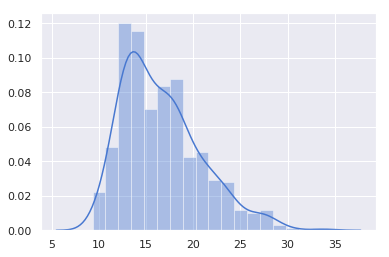

In [9]:
sns.distplot(errors)
plt.savefig('xgboost_simple.svg')
plt.show()